In [2]:
#For data managment 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt
#For Simple Linear Regression 
import statsmodels.api as sm


In [3]:
#reading in the file 
df = pd.read_csv(r'C:\Users\samlo\DataMining\PA4\heart-disease-data.csv')




In [4]:
#separating the NULL values from the data
test_data = df[df['BMI'].isnull()]
test_data

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
91,40,0,205,100.0,60.0,NaN,60,72,1
1048,64,3,221,148.0,85.0,NaN,90,80,1
1446,40,0,164,135.0,75.0,NaN,75,85,0
1456,40,20,266,101.0,73.0,NaN,70,64,0
1474,70,0,107,143.0,93.0,NaN,68,62,1
1783,63,20,213,163.0,94.0,NaN,76,69,1
1844,35,0,274,104.0,61.0,NaN,60,68,0
1861,58,1,244,160.5,98.0,NaN,86,69,0
1881,65,0,240,235.0,100.0,NaN,68,297,1
1955,53,0,240,109.0,79.0,NaN,92,80,1


In [5]:
#dropping the NUll values from the data frame and considering it the train data
df.dropna(inplace = True)
df

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,39,0,195,106.0,70.0,26.97,80,77,0
1,46,0,250,121.0,81.0,28.73,95,76,0
2,48,20,245,127.5,80.0,25.34,75,70,0
3,61,30,225,150.0,95.0,28.58,65,103,1
4,46,23,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...
3809,68,0,176,168.0,97.0,23.14,60,79,1
3810,50,1,313,179.0,92.0,25.97,66,86,1
3811,51,43,207,126.5,80.0,19.71,65,68,0
3812,48,20,248,131.0,72.0,22.00,84,86,0


In [6]:
#creating "X_train" and a "Y_train" from the data frame
y_train = df["BMI"]
y_train

0       26.97
1       28.73
2       25.34
3       28.58
4       23.10
        ...  
3809    23.14
3810    25.97
3811    19.71
3812    22.00
3813    21.47
Name: BMI, Length: 3800, dtype: float64

In [7]:
#X_train means "dataset except df['BMI'] features with Non NULL Values"
x_train = df.drop('BMI',axis=1)

In [8]:
#Building the model 
lr = LinearRegression()
#train the model on train data set
lr.fit(x_train,y_train)

LinearRegression()

In [9]:
#creating the X_test from the test_data
x_test = test_data.drop("BMI",axis=1)
x_test

,age,cigsPerDay,totChol,sysBP,diaBP,heartRate,glucose,CHD
91,40,0,205,100.0,60.0,60,72,1
1048,64,3,221,148.0,85.0,90,80,1
1446,40,0,164,135.0,75.0,75,85,0
1456,40,20,266,101.0,73.0,70,64,0
1474,70,0,107,143.0,93.0,68,62,1
1783,63,20,213,163.0,94.0,76,69,1
1844,35,0,274,104.0,61.0,60,68,0
1861,58,1,244,160.5,98.0,86,69,0
1881,65,0,240,235.0,100.0,68,297,1
1955,53,0,240,109.0,79.0,92,80,1


In [10]:
x_test.shape

(14, 8)

In [11]:
#Applying The trained model on the X_test
y_pred = lr.predict(x_test)
y_pred

array([22.98763624, 26.473629  , 24.73366214, 24.06577123, 26.91661014,
       27.07762383, 23.12512159, 27.83466903, 30.80470004, 25.58441273,
       23.52825446, 24.81620083, 24.80845108, 27.16446998])

In [12]:
#replace the missing values with predicted values
test_data.loc[test_data.BMI.isnull(),'BMI'] = y_pred

C:\Users\samlo\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
test_data

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
91,40,0,205,100.0,60.0,22.987636,60,72,1
1048,64,3,221,148.0,85.0,26.473629,90,80,1
1446,40,0,164,135.0,75.0,24.733662,75,85,0
1456,40,20,266,101.0,73.0,24.065771,70,64,0
1474,70,0,107,143.0,93.0,26.916610,68,62,1
1783,63,20,213,163.0,94.0,27.077624,76,69,1
1844,35,0,274,104.0,61.0,23.125122,60,68,0
1861,58,1,244,160.5,98.0,27.834669,86,69,0
1881,65,0,240,235.0,100.0,30.804700,68,297,1
1955,53,0,240,109.0,79.0,25.584413,92,80,1


In [16]:
##THE BMI DATA IS UPDATED AT THIS PINT


## THE BMI DATA IS UPDATED AT THIS POINT
## THE REST IS K-Nearest Neighbor and visualization stuff!!!!!!




In [17]:
#Reading in the updated file
df = pd.read_csv(r'C:\Users\samlo\DataMining\PA4\heart-disease-data-new.csv')


In [18]:
#dividing the data into X and Y attributes
X = df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].astype(float)
Y = df[['CHD']].astype(int)

In [19]:
#Partitioning the data into an 80 / 20 split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = .80)


In [20]:
#Creating the k-nearest neighbor

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train,Y_train['CHD'])
y_pred = model.predict(X_test)

In [21]:
pred = pd.DataFrame(y_pred,)
pred.rename(columns = {0:"pred"},inplace = True)
results = pd.concat([pred,Y_test.reset_index(drop=True)],axis=1)
results

,pred,CHD
0,1,1
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
758,0,0
759,0,0
760,0,0
761,0,0


In [22]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       642
           1       0.29      0.13      0.18       121

    accuracy                           0.81       763
   macro avg       0.57      0.53      0.54       763
weighted avg       0.76      0.81      0.78       763



In [23]:
print(confusion_matrix(Y_test,y_pred))

[[602  40]
 [105  16]]


<AxesSubplot:>

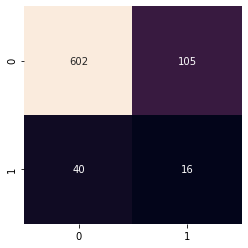

In [24]:
map = confusion_matrix(Y_test,y_pred)
sns.heatmap(map.T,square=True,annot=True,fmt='d',cbar = False)


In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy of prediction using KNN =",accuracy_score(y_pred,Y_test)*100)

Accuracy of prediction using KNN = 80.99606815203146


In [26]:
#That was K = 3; 

#Next is K = 10; 
#Creating the k-nearest neighbor

model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train,Y_train['CHD'])
y_pred = model.predict(X_test)

In [27]:
pred = pd.DataFrame(y_pred,)
pred.rename(columns = {0:"pred"},inplace = True)
results = pd.concat([pred,Y_test.reset_index(drop=True)],axis=1)
results

,pred,CHD
0,1,1
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
758,0,0
759,0,0
760,0,0
761,0,0


              precision    recall  f1-score   support

           0       0.85      0.99      0.91       642
           1       0.53      0.08      0.14       121

    accuracy                           0.84       763
   macro avg       0.69      0.53      0.53       763
weighted avg       0.80      0.84      0.79       763

[[633   9]
 [111  10]]
Accuracy of prediction using KNN = 84.27260812581913


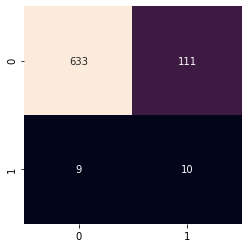

In [28]:
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
map = confusion_matrix(Y_test,y_pred)
sns.heatmap(map.T,square=True,annot=True,fmt='d',cbar = False)
from sklearn.metrics import accuracy_score
print("Accuracy of prediction using KNN =",accuracy_score(y_pred,Y_test)*100)

In [29]:
#that was k = 10; 

#Next will be k = 50; 

model = KNeighborsClassifier(n_neighbors = 50)
model.fit(X_train,Y_train['CHD'])
y_pred = model.predict(X_test)

In [30]:
pred = pd.DataFrame(y_pred,)
pred.rename(columns = {0:"pred"},inplace = True)
results = pd.concat([pred,Y_test.reset_index(drop=True)],axis=1)
results

,pred,CHD
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
758,0,0
759,0,0
760,0,0
761,0,0


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       642
           1       1.00      0.01      0.02       121

    accuracy                           0.84       763
   macro avg       0.92      0.50      0.47       763
weighted avg       0.87      0.84      0.77       763

[[642   0]
 [120   1]]
Accuracy of prediction using KNN = 84.27260812581913


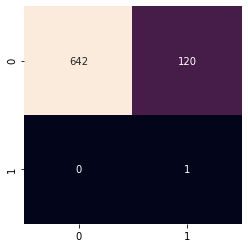

In [31]:

print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
map = confusion_matrix(Y_test,y_pred)

sns.heatmap(map.T,square=True,annot=True,fmt='d',cbar = False)
from sklearn.metrics import accuracy_score
print("Accuracy of prediction using KNN =",accuracy_score(y_pred,Y_test)*100)

C:\Users\samlo\anaconda3\lib\site-packages\seaborn\axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x00000211540EAD60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


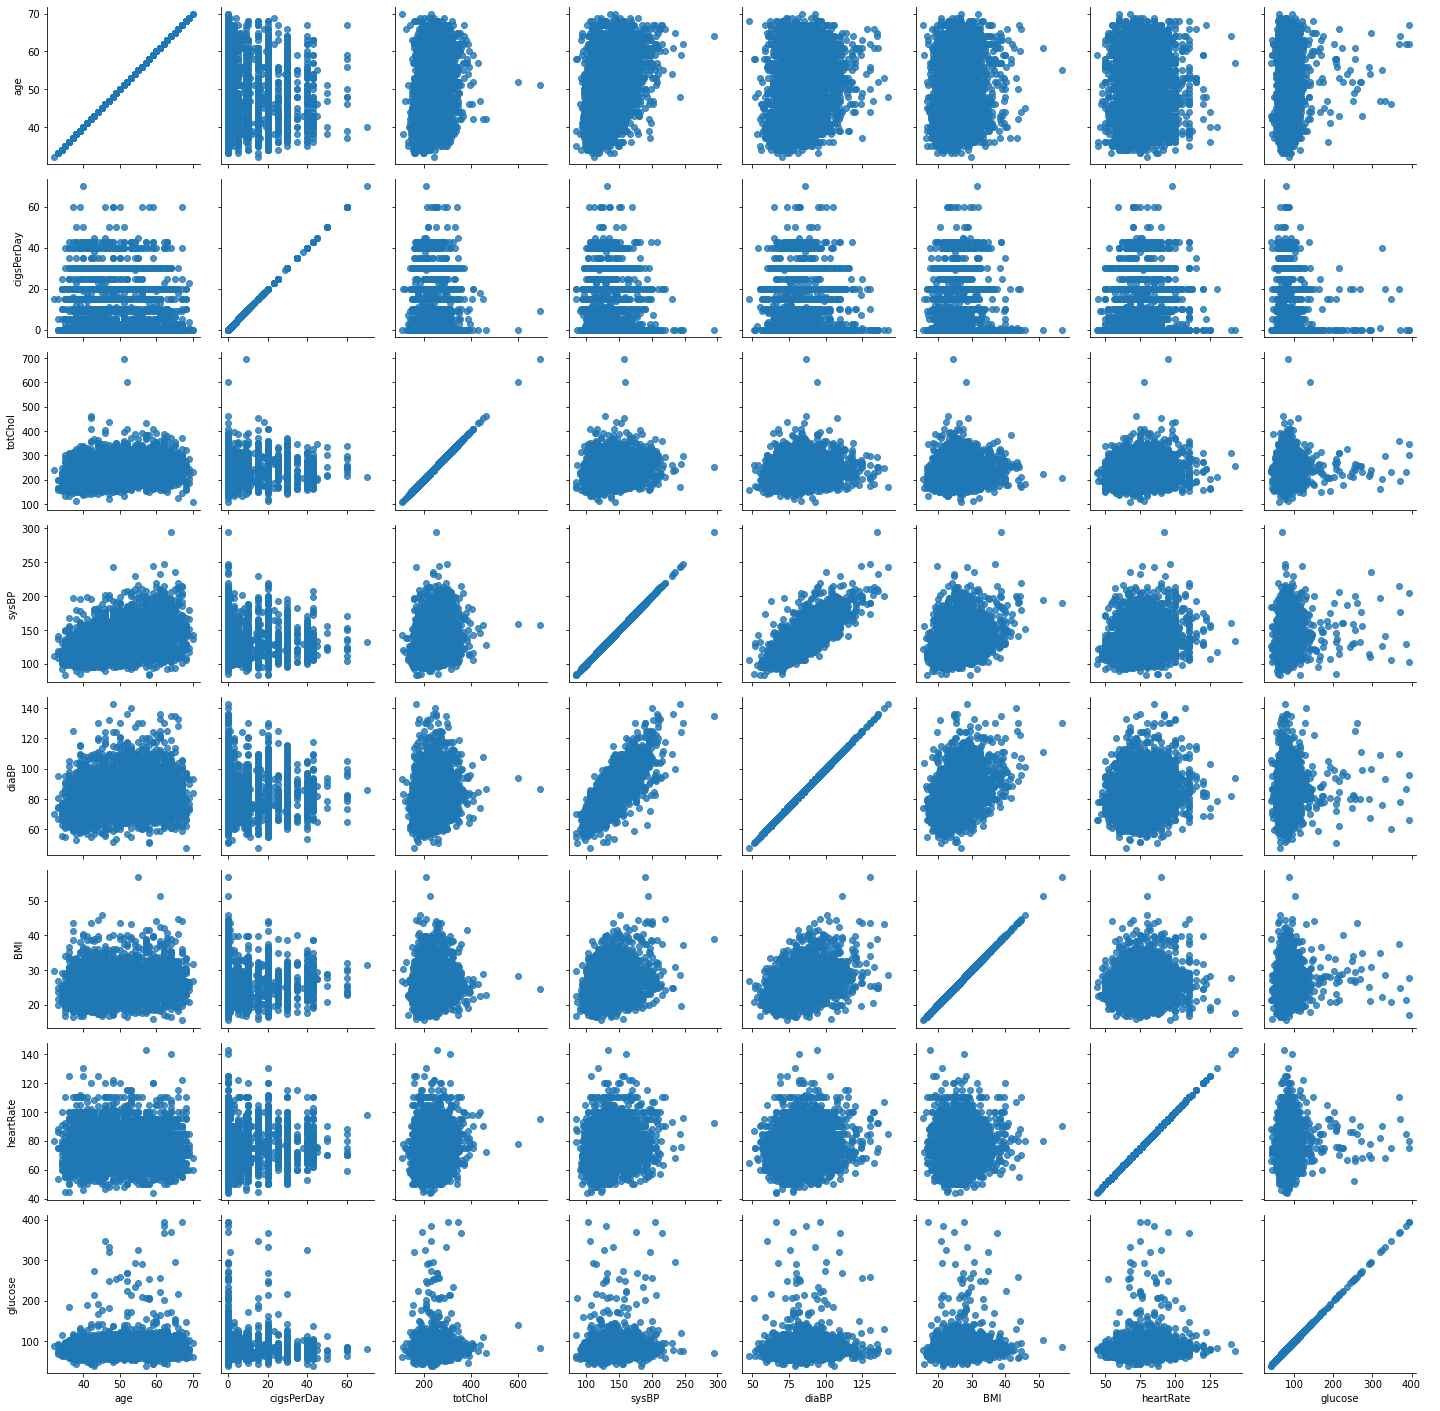

In [32]:
g = sns.PairGrid(df,vars=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'],palette = 'RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();